# YELP REVIEW CLASSIFICATION

### IMPORT DATA AND LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
yelp_df = pd.read_csv('yelp.csv')
yelp_df.head(7)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


### DATA VISUALIZATION

In [3]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [4]:
# Adding length of all the text in a cloumn
yelp_df['length'] = yelp_df['text'].apply(len)
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1349
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,423
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,471


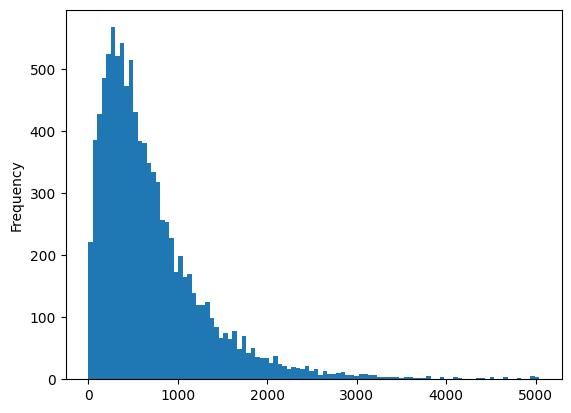

In [5]:
yelp_df.length.plot(bins=100, kind='hist')
plt.show()

In [6]:
yelp_df.length.describe()

count    10000.000000
mean       714.199700
std        620.863509
min          1.000000
25%        295.000000
50%        544.000000
75%        936.000000
max       5039.000000
Name: length, dtype: float64

In [7]:
## LONGEST MESSAGE AND SHORTEST MESSAGE
max_val = yelp_df.length.describe()['max']
min_val = yelp_df.length.describe()['min']
mean_val = int(yelp_df.length.describe()['50%'])

text_max = yelp_df[yelp_df['length'] == max_val]['text'].iloc[0]
text_min = yelp_df[yelp_df['length'] == min_val]['text'].iloc[0]
text_mean = yelp_df[yelp_df['length'] == mean_val]['text'].iloc[0]


print('MAX TEXT : ', text_max)
print('\n#########################  ############################\n')
print('MIN TEXT : ', text_min)
print('\n#########################  ############################\n')
print('MEAN TEXT : ', text_mean)

MAX TEXT :  I hate having to give out three star reviews. For me, 1-star isn't the worst possible rating you can an establishment, a 3 is. Because 3 stars means it invoked no reaction to you, neither joy or disgust, no pleasure or pain. 

I'd rather eat at a really shitty place that I'll remember than a so-so eatery that I'll forget the moment I get back into my truck.

If I want mediocre "take it or leave it" food I'll just cook for myself, kthxbye.

As BFeF's (Best Frienemies Forever), Clarice W and I frequently have lunch together in the Peoria area. The decision on what to eat is usually made using the following criteria: Where haven't we been that we can yelp about?

Our last lunch involved us going to Hope Kee and getting all wrapped up in their cutesy snack section and coming in late to work. So we needed somewhere relatively closer with no Hello Kitty gummi lips to distract us from our voyage back.

Clarice suggested Casa Filipina, a Filipino place by the Lenny's Burger somewhe

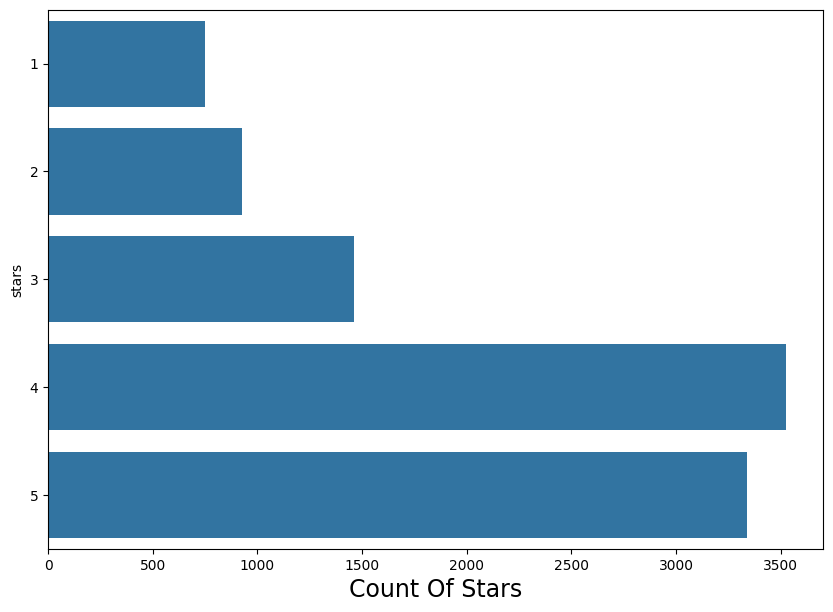

In [8]:
## COUNT OF STARS
plt.figure(figsize=(10, 7))
sns.countplot(y='stars', data=yelp_df)
plt.xlabel('Count Of Stars', fontsize=17)
plt.show()

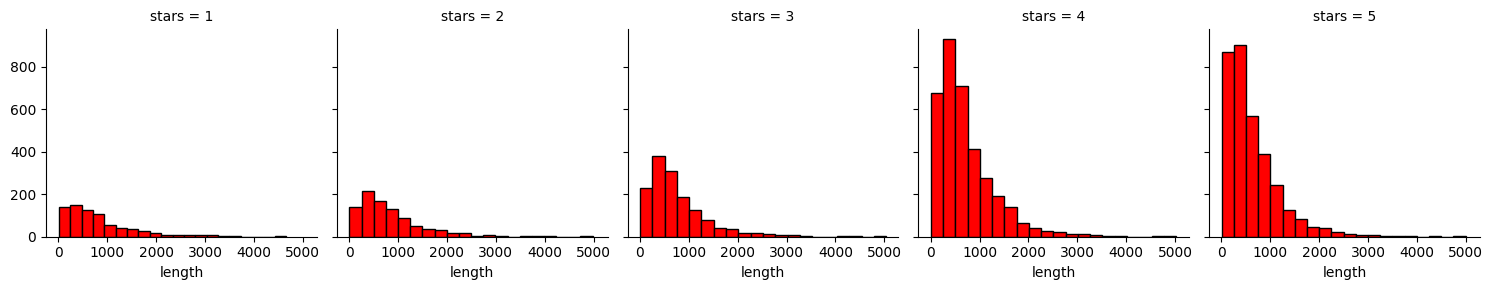

In [9]:
### FACETGRID OF LENGTH AND STARS
g = sns.FacetGrid(data=yelp_df, col='stars', col_wrap=5)
g.map(plt.hist, 'length', bins=20, color='r', ec='black')
plt.show()

In [10]:
## REVIEWS OF 1 and 5 stars

yelp_df_1 = yelp_df[yelp_df['stars'] == 1]
yelp_df_5 = yelp_df[yelp_df['stars'] == 5]

yelp_df_1_5 = pd.concat([yelp_df_1, yelp_df_5])

yelp_df_1_5.sample(7)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
1242,5VMajxduxfLPSyQkVFKESg,2010-12-22,wM199bUIqy-2w0je2L5Ojg,5,"Love. It. Awesome pulled pork, brisket, turk...",review,9ZbwFZhqWVwdbuYSP_FjWg,1,0,0,308
6741,FWvEeULc-ItQTENPlIyfuw,2012-03-06,8Jv-IP918Y2QmtNzylTesQ,5,The oatmeal cookie frozen yogurt here is amazi...,review,0mqHhdKEdak_A1FBhFNXqA,0,2,1,298
2029,vARjqeIkSNsazHltujiq4Q,2009-04-27,dpycAue1wVYLP0_Js18Avg,5,Being English and missing a lot of the things ...,review,BkdQfuEXY8k1karD0R9T1w,1,1,1,799
749,iWlaj4R-2BTsWR7PwL90BQ,2011-09-29,jhuJCBXos-g3xSWVky-NkQ,1,The organization is grand with a ton of select...,review,ZcjSjT_7mQOx2LOhYq01bw,0,1,0,660
5598,rSCQdj959petZ-vBGtq4xw,2012-03-23,emJl9kiTGRnNbAt0z04DAQ,5,This location is quieter than the one at Arizo...,review,-o3uGadqen-bc1HjMx_8Bw,0,1,1,754
8978,h6jfMpTZpNduLG0wE2tbaw,2011-03-03,vtbbkfMP_0D5rXz2Fz_UJA,5,I had such a great time at this place both tim...,review,Gu_tCn0lDuYBtd1NB1-Szw,2,1,0,1117
5393,azBHKHqif0NXO3xcALo5VQ,2009-10-04,xaJp1pIoy-Jt3VRCQDLT_g,5,Absolutely LOVE spicy pickle! Sandwiches are g...,review,98jhrpmyYcLLM0-9z-r2oA,0,0,0,309


In [11]:
yelp_df_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  length       4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [14]:
### PERCENTAGES OF 1 and 5 Stars

star1percnt = 100*len(yelp_df_1)/len(yelp_df_1_5)
star5percnt = 100*len(yelp_df_5)/len(yelp_df_1_5)

print('1-Star Percentage : {}%'.format(round(star1percnt, 2)))
print('5-Star Percentage : {}%'.format(round(star5percnt, 2)))

1-Star Percentage : 18.33%
5-Star Percentage : 81.67%


### CREATING TEST AND TRAIN DATA

#### REMOVE PUNCTUATION

In [15]:
import string
string .punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
test = 'hello #Mr.Future, I am too [happy] to learn AI!'

test_punct_removed = [char for char in test if char not in string.punctuation]
test_punct_removed

['h',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 't',
 'o',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 ' ',
 'A',
 'I']

In [17]:
test_punct_removed = ''.join(test_punct_removed)
test_punct_removed

'hello MrFuture I am too happy to learn AI'

#### REMOVE STOPWORDS

In [18]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
test_punct_removed

'hello MrFuture I am too happy to learn AI'

In [20]:
stopwords_removed = [word for word in test_punct_removed.split() if word.lower() not in stopwords.words('english')]
stopwords_removed

['hello', 'MrFuture', 'happy', 'learn', 'AI']

### MESSAGE CLEANER FUNCTION

In [21]:
def message_clean(message):
    punct_removed = [char for char in message if char not in string.punctuation]
    punct_removed_join = ''.join(punct_removed)
    stopwords_removed = [word for word in punct_removed_join.split() if word.lower() not in stopwords.words('english')]
    return stopwords_removed

In [22]:
yelp_df_clean = yelp_df_1_5['text'].apply(message_clean)
yelp_df_clean.head()

23    [U, go, n, check, car, u, wanna, buy, 1, Thats...
31    [Disgusting, Groupon, daughter, tried, outdate...
35    [Ive, eaten, many, times, none, bad, last, nig...
61    [always, fan, Burlingtons, deals, however, sho...
64    [Another, night, meeting, friends, laugh, Wait...
Name: text, dtype: object

In [23]:
print(yelp_df_clean[0]) # Cleaned Message

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [24]:
print(yelp_df_1_5['text'][0]) # Original Message

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


### COUNT VECTORIZER

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=message_clean)
yelp_countvectorizer = vectorizer.fit_transform(yelp_df_1_5['text'])

In [26]:
print(yelp_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
yelp_countvectorizer.shape

(4086, 26435)

### TRAINING MODEL WITH ALL DATASET

In [28]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = yelp_df_1_5['stars'].values


NB_classifier.fit(yelp_countvectorizer, label)

MultinomialNB()

In [29]:
test_sample = ['amazing food! highly recommended for everyone']

test_sample_cv = vectorizer.transform(test_sample)
test_predcit = NB_classifier.predict(test_sample_cv)

test_predcit

array([5], dtype=int64)

In [30]:
test_sample = ['worst food i ever tasted']

test_sample_cv = vectorizer.transform(test_sample)
test_predcit = NB_classifier.predict(test_sample_cv)

test_predcit

array([1], dtype=int64)

### DIVIDING TRAIN TEST

In [31]:
from sklearn.model_selection import train_test_split

X = yelp_countvectorizer
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=47)

In [32]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

### EVALAUATION OF MODELS

In [33]:
NB_classifier.score(X_train, y_train)

0.9828641370869033

In [34]:
NB_classifier.score(X_test, y_test)

0.910757946210269

In [35]:
from sklearn.metrics import classification_report, confusion_matrix


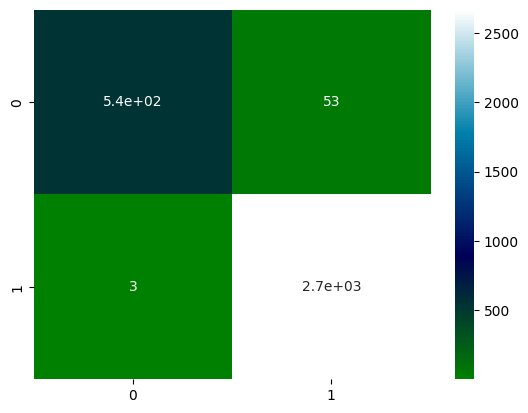

In [36]:
y_predict_train = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, cmap='ocean')
plt.show()

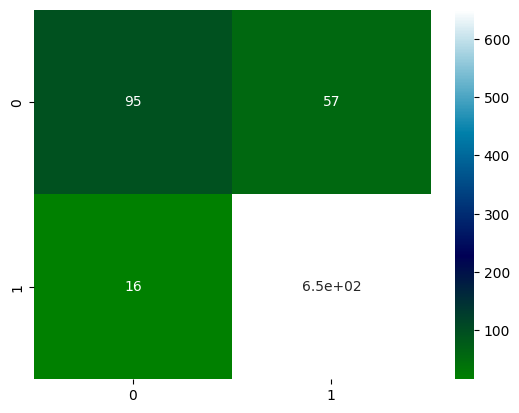

In [37]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap='ocean')
plt.show()

In [38]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.86      0.62      0.72       152
           5       0.92      0.98      0.95       666

    accuracy                           0.91       818
   macro avg       0.89      0.80      0.83       818
weighted avg       0.91      0.91      0.91       818

